# NLP _ project.

## (SMS Spam Collection Data-Set)            
                    Download:   Data Folder, Data Set Description 
### Data Set Information:

      This corpus has been collected from free or free for research sources at the Internet:

     *A collection of 425 SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in 
      which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam 
      message received. The identification of the text of spam messages in the claims is a very hard and time-consuming 
      task, and it involved carefully scanning hundreds of web pages. 
     *A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 
      legitimate messages collected for research at the Department of Computer Science at the National University of 
      Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These 
      messages were collected from volunteers who were made aware that their contributions were going to be made publicly 
      available.
     *A list of 450 SMS ham messages collected from Caroline Tag's PhD Thesis. 
     *Finally, we have incorporated the SMS Spam Corpus v.0.1 Big. It has 1,002 SMS ham messages and 322 spam messages and 
      it is public available. This corpus has been used in the following academic researches:

### Attribute Information:

     The collection is composed by just one text file, where each line has the correct class followed by the raw message. We  
     offer some examples bellow:

        ham What you doing?how are you?
        ham Ok lar... Joking wif u oni...
        ham dun say so early hor... U c already then say...
        ham MY NO. IN LUTON 0125698789 RING ME IF UR AROUND! H*
        ham Siva is in hostel aha:-.
        ham Cos i was out shopping wif darren jus now n i called him 2 ask wat present he wan lor. Then he started guessing   
        who i was wif n he finally guessed darren lor.
        spam FreeMsg: Txt: CALL to No: 86888 & claim your reward of 3 hours talk time to use from your phone now! 
        ubscribe6GBP/ mnth inc 3hrs 16 stop?txtStop
        spam Sunshine Quiz! Win a super Sony DVD recorder if you canname the capital of Australia? Text MQUIZ to 82277. B
        spam URGENT! Your Mobile No 07808726822 was awarded a L2,000 Bonus Caller Prize on 02/09/03! This is our 2nd attempt  
        to contact YOU! Call 0871-872-9758 BOX95QU

   Note: the messages are not chronologically sorted.



# 1. Lidraries & Data-Set.

In [1]:
# Importing all the required libraries.

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the Data-Set.

sms = pd.read_csv('SMSSpamCollection', sep = "\t", names = ['Label','Message'])

In [3]:
sms.head(10)

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [4]:
sms.shape

(5572, 2)

In [5]:
sms.columns

Index(['Label', 'Message'], dtype='object')

In [6]:
sms['Label'].value_counts()

ham     4825
spam     747
Name: Label, dtype: int64

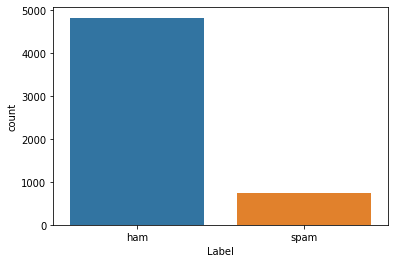

In [7]:
sns.countplot(x = 'Label',data = sms)

In [8]:
sms.describe()

,Label,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
sms['length'] = sms['Message'].apply(len)
sms.head()


,Label,Message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


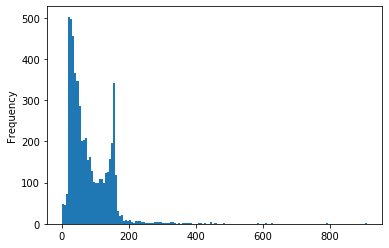

In [10]:
sms['length'].plot(bins =150,kind ='hist')

In [11]:
sms.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

# 2. Exploratory Data- Analysis.

In [12]:
from wordcloud import WordCloud, STOPWORDS

In [13]:
Sms_df = sms.loc[sms['Label']=='spam', :]

Sms_df.head(10)

,Label,Message,length
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147
8,spam,WINNER!! As a valued network customer you have...,157
9,spam,Had your mobile 11 months or more? U R entitle...,154
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136
12,spam,URGENT! You have won a 1 week FREE membership ...,155
15,spam,"XXXMobileMovieClub: To use your credit, click ...",149
19,spam,England v Macedonia - dont miss the goals/team...,155
34,spam,Thanks for your subscription to Ringtone UK yo...,158
42,spam,07732584351 - Rodger Burns - MSG = We tried to...,172


In [14]:
Sms_df['Label'].value_counts()

spam    747
Name: Label, dtype: int64

In [15]:
words = ' '.join(Sms_df['Message'])
print(words[:30000])

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030 SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18 XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or clic

In [16]:
Sms_df = sms.loc[sms['Label']=='spam', :]

words = ' '.join(Sms_df['Message'])

cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [17]:

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)

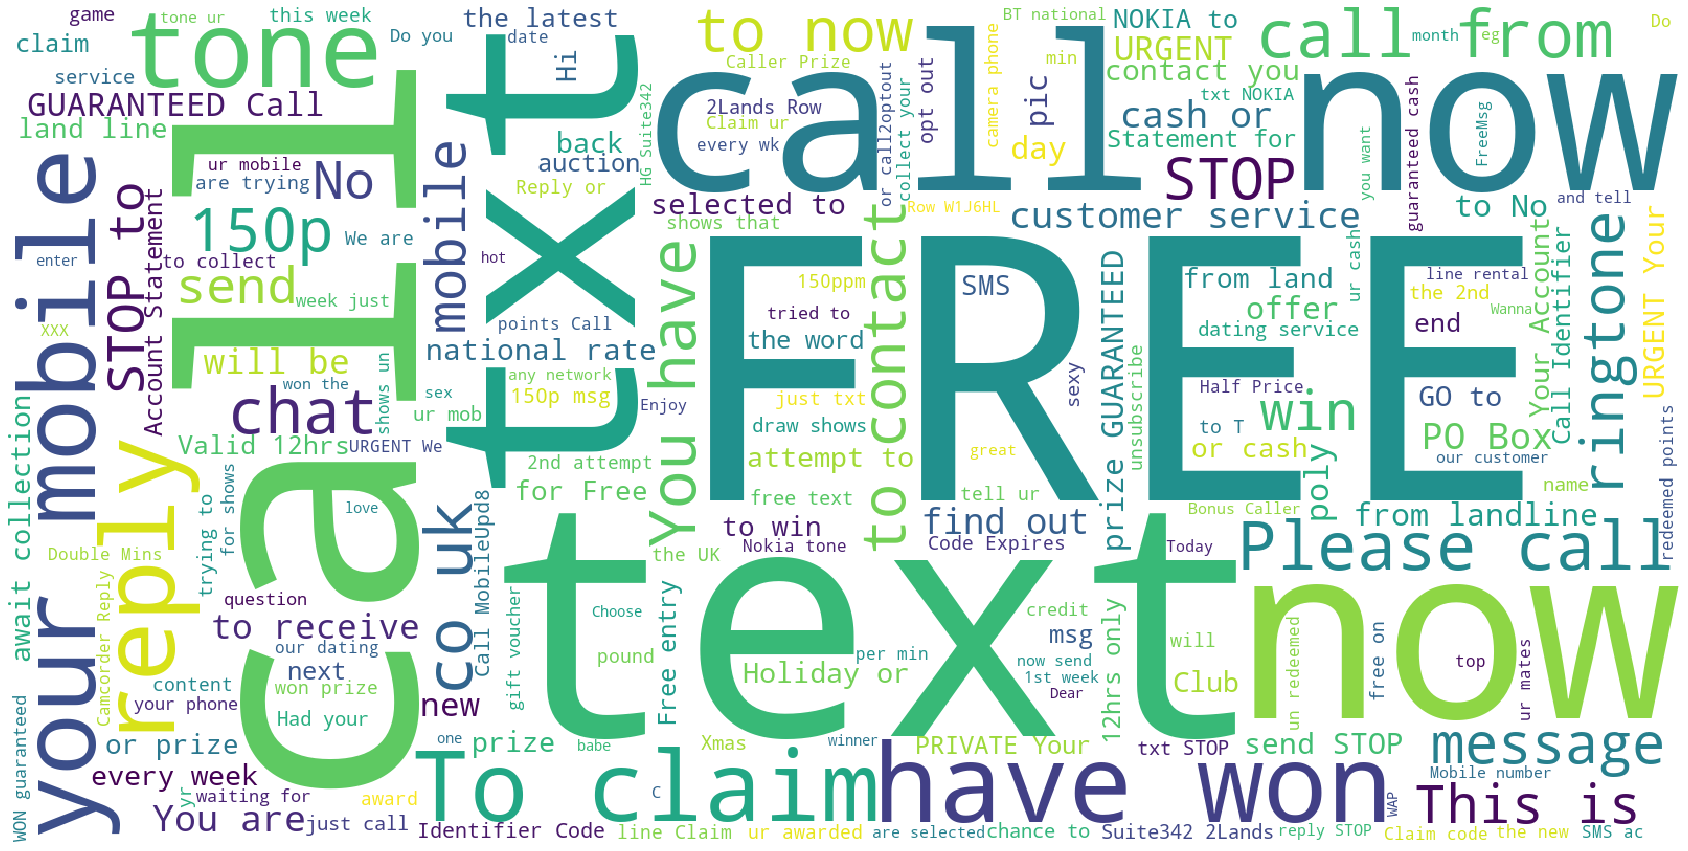

In [18]:
plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [19]:
SmS_df = sms.loc[sms['Label']=='ham', :]

SmS_df.head(10)

,Label,Message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
6,ham,Even my brother is not like to speak with me. ...,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160
10,ham,I'm gonna be home soon and i don't want to tal...,109
13,ham,I've been searching for the right words to tha...,196
14,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,35
16,ham,Oh k...i'm watching here:),26


In [20]:
SmS_df['Label'].value_counts()

ham    4825
Name: Label, dtype: int64

In [21]:

words = ' '.join(SmS_df['Message'])

print(words[:50000])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni... U dun say so early hor... U c already then say... Nah I don't think he goes to usf, he lives around here though Even my brother is not like to speak with me. They treat me like aids patent. As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today. I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times. I HAVE A DATE ON SUNDAY WITH WILL!! Oh k...i'm watching here:) Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet. Fine if thats the way u feel. Thats the way its gota 

In [22]:
SmS_df = sms.loc[sms['Label']=='ham', :]

words = ' '.join(SmS_df['Message'])

cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [23]:

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)

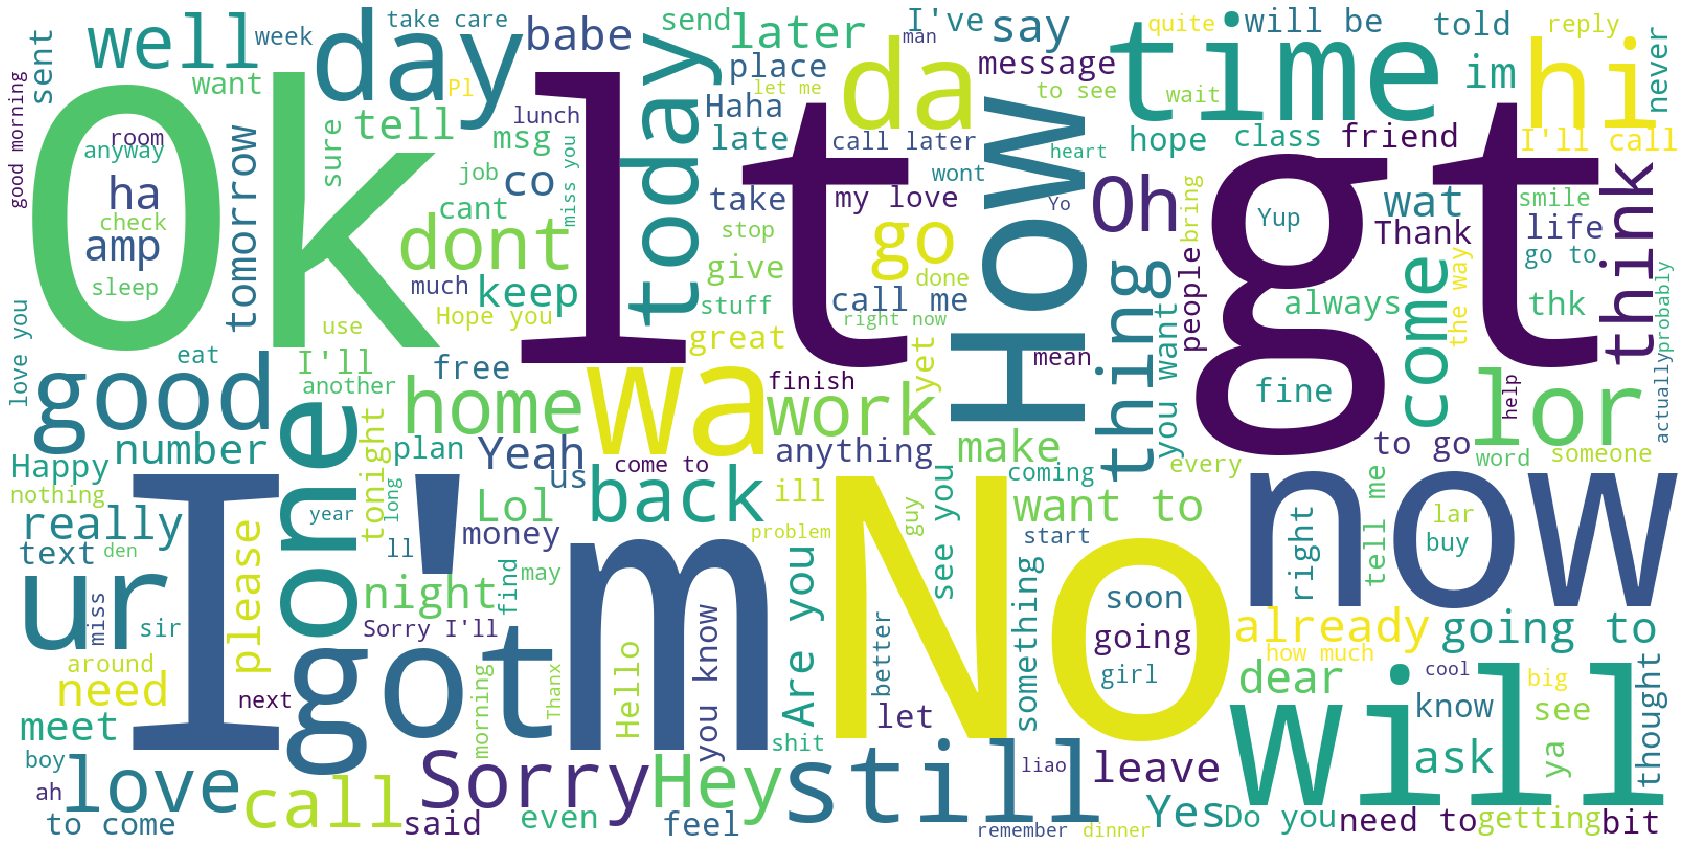

In [24]:
plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# 3. Preprocessing of the Data-Set.

In [25]:
# Importing required libraries.
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer


In [26]:
# initialise the inbuilt Stemmer

stemmer = PorterStemmer()

In [27]:
# We can also use Lemmatizer instead of Stemmer

lemmatizer = WordNetLemmatizer()

In [28]:
# initializing the lists

clean_sms_lst = []

sms_len_lst = []

In [29]:
def preprocess(raw_sms, flag):
    # Removing special characters and digits
    letters_only = re.sub("[^a-zA-Z]", " ",raw_sms)
    
    # change sentence to lower case
    letters_only = letters_only.lower()

    # tokenize into words
    words = letters_only.split()
    
    # remove stop words                
    words = [w for w in words if not w in stopwords.words("english")]
    
    #Stemming/Lemmatization
    if(flag == 'stem'):
        words = [stemmer.stem(word) for word in words]
    else:
        words = [lemmatizer.lemmatize(word) for word in words]
    
    clean_sms_lst.append(" ".join(words))
    
    sms_len_lst.append(len(words))

In [30]:

from tqdm import tqdm, tqdm_notebook

tqdm.pandas()

In [31]:
clean_sms_lst = []

sms_len_lst = []

sms['Message'].progress_apply(lambda x: preprocess(x, 'stem'))

sms['clean_sms_stem'] = clean_sms_lst

sms['sms_length_stem'] = sms_len_lst

100%|█████████████████████████████████████████████████████████████████████████████| 5572/5572 [00:17<00:00, 181.22it/s]


In [32]:
clean_sms_lst = []

sms_len_lst = []
sms['Message'].progress_apply(lambda x: preprocess(x, 'lemma'))
sms['clean_sms_lema'] = clean_sms_lst
sms['sms_length_lema'] = sms_len_lst

100%|█████████████████████████████████████████████████████████████████████████████| 5572/5572 [00:19<00:00, 287.40it/s]


In [33]:
sms.head()

,Label,Message,length,clean_sms_stem,sms_length_stem,clean_sms_lema,sms_length_lema
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...,16,go jurong point crazy available bugis n great ...,16
1,ham,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni,6,ok lar joking wif u oni,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri wkli comp win fa cup final tkt st m...,21,free entry wkly comp win fa cup final tkts st ...,21
3,ham,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say,9,u dun say early hor u c already say,9
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though,7,nah think go usf life around though,7


In [34]:
# Preparing the target variable

sms['sentiment']=sms['Label'].apply(lambda x: 0 if x == 'spam' else 1)
sms.head()

,Label,Message,length,clean_sms_stem,sms_length_stem,clean_sms_lema,sms_length_lema,sentiment
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...,16,go jurong point crazy available bugis n great ...,16,1
1,ham,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni,6,ok lar joking wif u oni,6,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri wkli comp win fa cup final tkt st m...,21,free entry wkly comp win fa cup final tkts st ...,21,0
3,ham,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say,9,u dun say early hor u c already say,9,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though,7,nah think go usf life around though,7,1


In [35]:
# splitting into test and train

from sklearn.model_selection  import train_test_split

train, test = train_test_split(sms,test_size=0.55,random_state=90)

In [36]:
train_clean_sms=[]
for sms in train['clean_sms_lema']:
    train_clean_sms.append(sms)

test_clean_sms=[]
for sms in test['clean_sms_lema']:
    test_clean_sms.append(sms)

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
 
vectorizer = CountVectorizer()
train_features = vectorizer.fit_transform(train_clean_sms)
test_features = vectorizer.transform(test_clean_sms)

In [38]:
vectorizer.vocabulary_

{'call': 534,
 'lt': 2260,
 'gt': 1629,
 'min': 2418,
 'thats': 3957,
 'ok': 2710,
 'yep': 4549,
 'like': 2181,
 'pink': 2896,
 'furniture': 1484,
 'tho': 3988,
 'ummma': 4172,
 'check': 632,
 'life': 2175,
 'begin': 354,
 'qatar': 3093,
 'pls': 2922,
 'pray': 2998,
 'hard': 1686,
 'sent': 3434,
 'scream': 3390,
 'moan': 2453,
 'bed': 346,
 'princess': 3025,
 'dhoni': 978,
 'luck': 2264,
 'win': 4423,
 'big': 379,
 'title': 4032,
 'awesome': 274,
 'question': 3103,
 'cute': 871,
 'answer': 156,
 'someone': 3616,
 'asked': 220,
 'boy': 447,
 'ur': 4217,
 'smiled': 3584,
 'amp': 131,
 'answered': 157,
 'fine': 1343,
 'gudnite': 1635,
 'wife': 4417,
 'text': 3939,
 'buy': 518,
 'tell': 3917,
 'relax': 3208,
 'go': 1559,
 'get': 1528,
 'wkend': 4449,
 'holy': 1772,
 'living': 2203,
 'christ': 670,
 'taking': 3875,
 'long': 2223,
 'give': 1548,
 'minute': 2429,
 'think': 3975,
 'see': 3410,
 'btw': 490,
 'alibi': 106,
 'cutting': 873,
 'hair': 1659,
 'whole': 4408,
 'time': 4022,
 'actually

In [39]:
print("Total unique words:", len(vectorizer.vocabulary_))

print("Type of train_features:", type(train_features))

print("Shape of input data", train_features.shape)

Total unique words: 4581
Type of train_features: <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data (2507, 4581)


# 4. Training the Model.

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [61]:
Classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    SVC(probability = True)]
print(classifiers)

['LogisticRegression', 'DecisionTreeClassifier', 'SVC']


# 5. Evaluation of each Algorithm.

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Accuracy of LogisticRegression is 0.9738988580750407


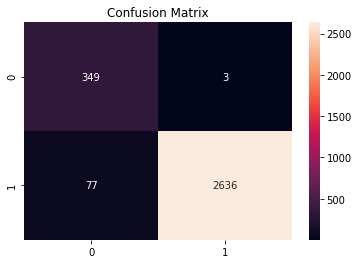

              precision    recall  f1-score   support

           0       0.82      0.99      0.90       352
           1       1.00      0.97      0.99      2713

    accuracy                           0.97      3065
   macro avg       0.91      0.98      0.94      3065
weighted avg       0.98      0.97      0.97      3065



 33%|████████████████████████████                                                        | 1/3 [00:00<00:00,  3.05it/s]

Accuracy of DecisionTreeClassifier is 0.9582381729200653


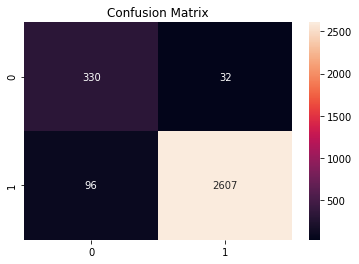

              precision    recall  f1-score   support

           0       0.77      0.91      0.84       362
           1       0.99      0.96      0.98      2703

    accuracy                           0.96      3065
   macro avg       0.88      0.94      0.91      3065
weighted avg       0.96      0.96      0.96      3065



 67%|████████████████████████████████████████████████████████                            | 2/3 [00:06<00:01,  1.99s/it]

Accuracy of SVC is 0.8610114192495921


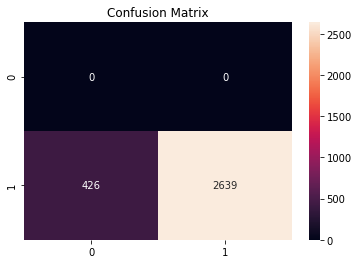

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.86      0.93      3065

    accuracy                           0.86      3065
   macro avg       0.50      0.43      0.46      3065
weighted avg       1.00      0.86      0.93      3065



100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [01:15<00:00, 22.08s/it]


In [55]:
dense_features = train_features.toarray()

dense_test = test_features.toarray()
acc = []
for classifier in tqdm(Classifiers):
    fit = classifier.fit(dense_features,train['sentiment'])
    pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['sentiment'])
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))
    
    # Confusion Metrics
    
    sns.heatmap(metrics.confusion_matrix(pred,test['sentiment']), annot=True, fmt='d')
    plt.title("Confusion Matrix")
    plt.show()
    
    # Classification Report
    metrics.classification_report(pred,test['sentiment'])
    print( metrics.classification_report(pred,test['sentiment']))
    acc.append(accuracy) 

# 6. Classification report.

In [65]:
Acc_report= pd.DataFrame(acc, columns = ['accuracy'], index = classifiers)
Acc_report

,accuracy
LogisticRegression,0.973899
DecisionTreeClassifier,0.958238
SVC,0.861011
